##  **Support Vector machine**



In [1]:
# Load libraries
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
import seaborn as sns
import string 

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn import preprocessing
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#Classifier
from sklearn.svm import SVC


#Visualizers
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
import matplotlib.pyplot as plt

#Metrics
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import log_loss
from sklearn.metrics import zero_one_loss
from sklearn.metrics import matthews_corrcoef

#libraries
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Dataset

filename = 'Descripcion.csv' 
DataSet0 = pd.read_csv(filename)
DataSet0


,tik_codigo,descripcion,propietario,categoria,modulo,producto,ans,nombre_cliente,Linea_Negocio
0,TIK1460,Presentacion Moodle,1.053860e+09,No definido,NaN,NaN,NaN,SIGMA Ingeniería S.A,SIGMA
1,TIK1005,Revision Presentacion Aliado de Negocio JEEP,2.434445e+07,No definido,NaN,NaN,NR,SIGMA Ingeniería S.A,SIGMA
2,TIK1006,Se debe realizar la configuración de los servi...,1.607954e+07,Creación de servicios,NaN,NaN,NR,Cartagueña de Aseo Total ESP,Geoaseo
3,TIK1015,Análisis Calidad y verificaciones.,1.058818e+09,No definido,NaN,NaN,NR,Codensa,Geolumina
4,TIK7096,Capa predial Cartagena,2.434355e+07,No definido,NaN,NaN,NR,SIGMA Ingeniería S.A,SIGMA
...,...,...,...,...,...,...,...,...,...
13601,TIK11085,BARRA HERRAMIENTAS PENDIENTE VEHICULO,1.053771e+09,1- Nuevo requerimiento,NaN,NaN,NR,SIGMA Ingeniería S.A,SIGMA
13602,TIK11506,Generar nueva app de conductor de bioagricola,1.059712e+09,1- Nuevo requerimiento,NaN,NaN,NR,Bioagrícola del Llano,Geoaseo
13603,TIK11507,modificar perfil de rioaseo,1.059712e+09,Cambiar estado de OT,NaN,NaN,SS,Rio Aseo Total ESP,Geoaseo
13604,TIK11509,Creación de un usuario de consulta para la Con...,7.510752e+07,Creación / inactivación de usuario,NaN,NaN,SS,CAR Magdalena,Geoambiental


In [3]:

PorBorrar1 = DataSet0[DataSet0['descripcion'].isnull()].index
DataSet0=DataSet0.drop(PorBorrar1, axis=0).reset_index(drop = True)
PorBorrar1 = DataSet0[DataSet0['categoria'].isnull()].index
DataSet0=DataSet0.drop(PorBorrar1, axis=0).reset_index(drop = True)
# PorBorrar1 = DataSet0[DataSet0['nombre_cliente'].isnull()].index
# DataSet0=DataSet0.drop(PorBorrar1, axis=0).reset_index(drop = True)
# PorBorrar1 = DataSet0[DataSet0['Linea_Negocio'].isnull()].index
# DataSet0=DataSet0.drop(PorBorrar1, axis=0).reset_index(drop = True)


PorBorrar1 = DataSet0[DataSet0['categoria'] == '1- Nuevo requerimiento'].index
DataSet0=DataSet0.drop(PorBorrar1, axis=0).reset_index(drop = True)
PorBorrar1 = DataSet0[DataSet0['categoria'] == 'No definido'].index
DataSet0=DataSet0.drop(PorBorrar1, axis=0).reset_index(drop = True)

In [4]:
DataSet0['descripcion'] = DataSet0['descripcion'].str.lower()
DataSet0

,tik_codigo,descripcion,propietario,categoria,modulo,producto,ans,nombre_cliente,Linea_Negocio
0,TIK1006,se debe realizar la configuración de los servi...,1.607954e+07,Creación de servicios,NaN,NaN,NR,Cartagueña de Aseo Total ESP,Geoaseo
1,TIK1007,crear servicios geoserver,2.434355e+07,Creación de servicios,NaN,NaN,NR,Llanogas,Geolumina
2,TIK1008,crear servicios geoserver,2.434355e+07,Creación de servicios,NaN,NaN,NR,Llanogas,Geolumina
3,TIK1016,"construcción, mantenimiento y migración de la ...",1.053809e+09,Informes de reporte y mantenimiento,NaN,NaN,NR,SIGMA Ingeniería S.A,SIGMA
4,TIK1020,publicación servicio geoserver,2.434355e+07,Creación de servicios,NaN,NaN,NR,Llanogas,Geolumina
...,...,...,...,...,...,...,...,...,...
8314,TIK11494,"cordial saludo, adjunto la carga de tickets de...",1.059712e+09,Gestión de tickets de servicio,NaN,NaN,CD,Veolia (antiguo Grupo Sala),Geoaseo
8315,TIK11424,"por favor actualizar las capas de macros, micr...",1.059712e+09,Informes de reporte y mantenimiento,NaN,NaN,SS,Veolia (antiguo Grupo Sala),Geoaseo
8316,TIK11507,modificar perfil de rioaseo,1.059712e+09,Cambiar estado de OT,NaN,NaN,SS,Rio Aseo Total ESP,Geoaseo
8317,TIK11509,creación de un usuario de consulta para la con...,7.510752e+07,Creación / inactivación de usuario,NaN,NaN,SS,CAR Magdalena,Geoambiental


In [5]:
DataSet0['descripcion'] = DataSet0['descripcion'].str.replace(u"á", "a")
DataSet0['descripcion'] = DataSet0['descripcion'].str.replace(u"é", "e")
DataSet0['descripcion'] = DataSet0['descripcion'].str.replace(u"í", "i")
DataSet0['descripcion'] = DataSet0['descripcion'].str.replace(u"ó", "o")
DataSet0['descripcion'] = DataSet0['descripcion'].str.replace(u"ú", "u")
DataSet0['descripcion'] = DataSet0['descripcion'].str.replace(u"ñ", "n")
DataSet0

,tik_codigo,descripcion,propietario,categoria,modulo,producto,ans,nombre_cliente,Linea_Negocio
0,TIK1006,se debe realizar la configuracion de los servi...,1.607954e+07,Creación de servicios,NaN,NaN,NR,Cartagueña de Aseo Total ESP,Geoaseo
1,TIK1007,crear servicios geoserver,2.434355e+07,Creación de servicios,NaN,NaN,NR,Llanogas,Geolumina
2,TIK1008,crear servicios geoserver,2.434355e+07,Creación de servicios,NaN,NaN,NR,Llanogas,Geolumina
3,TIK1016,"construccion, mantenimiento y migracion de la ...",1.053809e+09,Informes de reporte y mantenimiento,NaN,NaN,NR,SIGMA Ingeniería S.A,SIGMA
4,TIK1020,publicacion servicio geoserver,2.434355e+07,Creación de servicios,NaN,NaN,NR,Llanogas,Geolumina
...,...,...,...,...,...,...,...,...,...
8314,TIK11494,"cordial saludo, adjunto la carga de tickets de...",1.059712e+09,Gestión de tickets de servicio,NaN,NaN,CD,Veolia (antiguo Grupo Sala),Geoaseo
8315,TIK11424,"por favor actualizar las capas de macros, micr...",1.059712e+09,Informes de reporte y mantenimiento,NaN,NaN,SS,Veolia (antiguo Grupo Sala),Geoaseo
8316,TIK11507,modificar perfil de rioaseo,1.059712e+09,Cambiar estado de OT,NaN,NaN,SS,Rio Aseo Total ESP,Geoaseo
8317,TIK11509,creacion de un usuario de consulta para la con...,7.510752e+07,Creación / inactivación de usuario,NaN,NaN,SS,CAR Magdalena,Geoambiental


In [6]:
punct = string.punctuation
for c in punct:
    DataSet0['descripcion'] = DataSet0['descripcion'].replace(c, " ")

DataSet0

,tik_codigo,descripcion,propietario,categoria,modulo,producto,ans,nombre_cliente,Linea_Negocio
0,TIK1006,se debe realizar la configuracion de los servi...,1.607954e+07,Creación de servicios,NaN,NaN,NR,Cartagueña de Aseo Total ESP,Geoaseo
1,TIK1007,crear servicios geoserver,2.434355e+07,Creación de servicios,NaN,NaN,NR,Llanogas,Geolumina
2,TIK1008,crear servicios geoserver,2.434355e+07,Creación de servicios,NaN,NaN,NR,Llanogas,Geolumina
3,TIK1016,"construccion, mantenimiento y migracion de la ...",1.053809e+09,Informes de reporte y mantenimiento,NaN,NaN,NR,SIGMA Ingeniería S.A,SIGMA
4,TIK1020,publicacion servicio geoserver,2.434355e+07,Creación de servicios,NaN,NaN,NR,Llanogas,Geolumina
...,...,...,...,...,...,...,...,...,...
8314,TIK11494,"cordial saludo, adjunto la carga de tickets de...",1.059712e+09,Gestión de tickets de servicio,NaN,NaN,CD,Veolia (antiguo Grupo Sala),Geoaseo
8315,TIK11424,"por favor actualizar las capas de macros, micr...",1.059712e+09,Informes de reporte y mantenimiento,NaN,NaN,SS,Veolia (antiguo Grupo Sala),Geoaseo
8316,TIK11507,modificar perfil de rioaseo,1.059712e+09,Cambiar estado de OT,NaN,NaN,SS,Rio Aseo Total ESP,Geoaseo
8317,TIK11509,creacion de un usuario de consulta para la con...,7.510752e+07,Creación / inactivación de usuario,NaN,NaN,SS,CAR Magdalena,Geoambiental


In [7]:
patterns_labels = ['Configuración GPS',
                    'Revisión de formularios',
                    'Auditoria del sistema / interrupción completa de servicio',
                    'Informes de reporte y mantenimiento',
                    'Configuración de visor',
                    'Creación / inactivación  de usuario',
                    'Datos erróneos en reporte / actualización de reportes',
                    'Disminución de desempeño de plataforma',
                    'Carga de datos masiva, gestión de tickets',
                    'No envia el backup de app móvil / no cargan datos en app',
                    'Cambiar datos por BD, Cambiar estado de OT',
                    'Capacitación de módulo o funcionalidad',
                    'Creación de servicios / publicación de servicios' ]


                  
patterns_colors = ['indigo', 'tab:orange', 'maroon', 'tab:olive' , 'tab:brown' , 'lawngreen',
                  'tab:pink' ,'r', 'g', 'b', 'c' , 'm' , 'y'] # 'k' , '#6E2C00']


correct_Pattern_labels = DataSet0['categoria'].values


DataSet0 = DataSet0.drop(['tik_codigo','propietario', 'modulo', 'producto', 'ans'], axis=1)

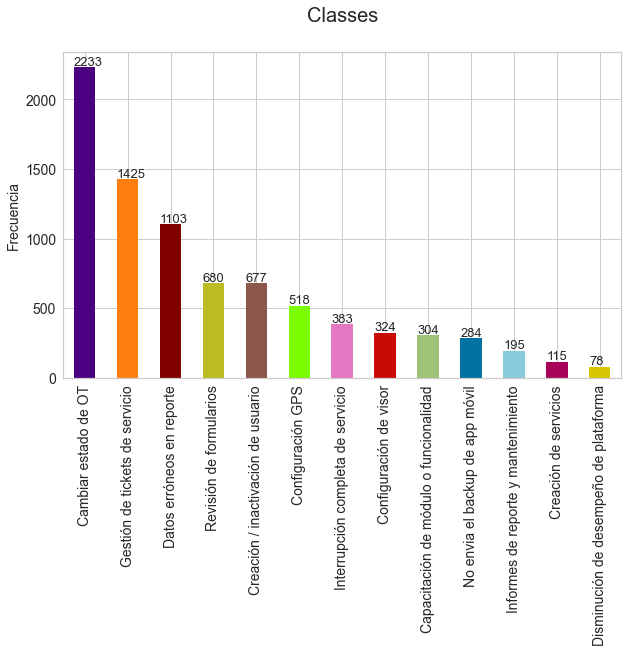

In [8]:
# Dataset distribution
ax = DataSet0['categoria'].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=14, color=patterns_colors)
ax.set_title('Classes', size=20, pad=30)
ax.set_ylabel('Frecuencia', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() , i.get_height() + 15, str(round(i.get_height(), 5)), fontsize=13)

In [120]:
# class distribution
print('DataSet category distrubution: \n')
print(DataSet0.groupby('categoria').size())

DataSet category distrubution: 

categoria
Cambiar estado de OT                      2233
Capacitación de módulo o funcionalidad     304
Configuración GPS                          518
Configuración de visor                     324
Creación / inactivación de usuario         677
Creación de servicios                      115
Datos erróneos en reporte                 1103
Disminución de desempeño de plataforma      78
Gestión de tickets de servicio            1425
Informes de reporte y mantenimiento        195
Interrupción completa de servicio          383
No envia el backup de app móvil            284
Revisión de formularios                    680
dtype: int64


In [121]:
X = DataSet0['descripcion']
y = DataSet0['categoria']

X

0       se debe realizar la configuracion de los servi...
1                              crear servicios geoserver 
2                              crear servicios geoserver 
3       construccion, mantenimiento y migracion de la ...
4                          publicacion servicio geoserver
                              ...                        
8314    cordial saludo, adjunto la carga de tickets de...
8315    por favor actualizar las capas de macros, micr...
8316                          modificar perfil de rioaseo
8317    creacion de un usuario de consulta para la con...
8318    solicito amablemente realizar el cargue de ope...
Name: descripcion, Length: 8319, dtype: object

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=0.20, random_state=42)

In [123]:
print(X.shape,y.shape,X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(8319,) (8319,) (6655,) (6655,) (1664,) (1664,)


In [124]:
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words=stopwords.words("spanish"))
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
print(X_train.shape, X_test.shape)


(6655, 3637) (1664, 3637)


In [11]:
print(X_train)

  (0, 2378)	0.5817150515835322
  (0, 3135)	0.563120100393816
  (0, 784)	0.49067333857674417
  (0, 2940)	0.3220916423994557
  (1, 203)	0.3527979930970905
  (1, 1684)	0.3527979930970905
  (1, 753)	0.34680239351280445
  (1, 2836)	0.34680239351280445
  (1, 2486)	0.3156798771821313
  (1, 186)	0.13930510566615498
  (1, 388)	0.29388043061563307
  (1, 1420)	0.16576322570278063
  (1, 1683)	0.2974743722006057
  (1, 1250)	0.2805337480453097
  (1, 2413)	0.1720584946973376
  (1, 751)	0.25273870189452546
  (1, 2827)	0.13018961972049897
  (2, 1522)	0.22223525744209657
  (2, 3389)	0.2359409869316606
  (2, 1456)	0.2359409869316606
  (2, 1122)	0.24373680458681532
  (2, 2035)	0.24373680458681532
  (2, 2623)	0.24373680458681532
  (2, 3109)	0.20551549142937162
  (2, 167)	0.16521150531917836
  :	:
  (6651, 1608)	0.42789288121843827
  (6651, 2779)	0.38600547636149735
  (6651, 784)	0.3966286516627921
  (6652, 1293)	0.43779087576489356
  (6652, 3253)	0.39388272732343227
  (6652, 290)	0.3369077707293135
  (6652

### Measurement metrics
**Classification report:** 
The classification report provides the main classification metrics on a per-class basis. a) Precision (tp / (tp + fp) ) measures the ability of a classifier to identify only the correct instances for each class. b) Recall (tp / (tp + fn) is the ability of a classifier to find all correct instances per class. c) F1 score is a weighted harmonic mean of precision and recall normalized between 0 and 1. F score of 1 indicates a perfect balance as precision and the recall are inversely related. A high F1 score is useful where both high recall and precision is important.
d) Support is the number of actual occurrences of the class in the test data set. Imbalanced support in the training data may indicate the need for stratified sampling or rebalancing.

**Confusion Matrix:**
A confusion matrix shows the combination of the actual and predicted classes. Each row of the matrix represents the instances in a predicted class, while each column represents the instances in an actual class. It is a good measure of wether models can account for the overlap in class properties and to understand which classes are most easily confused.

**Class Prediction Error:** 
This is a useful extension of the confusion matrix and visualizes the misclassified classes as a stacked bar. Each bar is a composite measure of predicted classes.

**Aggregate metrics:**
These provide a score for the overall performance of the classifier across the class spectrum.

**Cohen’s Kappa:** 
This is one of the best metrics for evaluating multi-class classifiers on imbalanced datasets. The traditional metrics from the classification report are biased towards the majority class and assumes an identical distribution of the actual and predicted classes. In contrast, Cohen’s Kappa Statistic measures the proximity of the predicted classes to the actual classes when compared to a random classification. The output is normalized between 0 and 1 the metrics for each classifier, therefore can be directly compared across the classification task. Generally closer the score is to one, better the classifier.

**Cross-Entropy:** 
Cross entropy measures the extent to which the predicted probabilities match the given data, and is useful for probabilistic classifiers such as Naïve Bayes. It is a more generic form of the logarithmic loss function, which was derived from neural network architecture, and is used to quantify the cost of inaccurate predictions. The classifier with the lowest log loss is preferred.

**Mathews Correlation Coefficient (MCC):**
MCC , originally devised for binary classification on unbalanced classes, has been extended to evaluates multiclass classifiers by computing the correlation coefficient between the observed and predicted classifications. A coefficient of +1 represents a perfect prediction, 0 is similar to a random prediction and −1 indicates an inverse prediction.

### Functions

In [54]:
import itertools

def plot_confusion_matrix(cm, classes = patterns_labels ,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)
    #print(cm)
    plt.subplots(figsize=(12,12))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.grid(False)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90) # , rotation=45
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [55]:
#Write function for class-centric metrics
# Classification report
def CR_viz():
    def Class_report(model,classes = patterns_labels):
        visualizer = ClassificationReport(model, classes=classes, support=True)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        return visualizer.poof()
#     for name in classifier:
#     plt.subplots(figsize=(15,15))
    ax = plt.figure() #plt.subplot(1,1,1) figsize=(5,5)
    Class_report(classifier,classes = patterns_labels)
    plt.savefig('ClasfReport.jpg',dpi=100,bbox_inches = "tight")

#Class Prediction Error
def CPE_viz():    
    def CPE(model,classes = patterns_labels):
        visualizer = ClassPredictionError(model, classes=classes)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
        return visualizer.poof()  
#     for name in classifier:
#     plt.subplots(figsize=(15,15))
    ax = plt.figure() #plt.subplot(1,1,1)
#     plt.subplots(figsize=(15,15))
    CPE(classifier,classes = patterns_labels)
    plt.savefig('ClasfPredErr.jpg',dpi=100,bbox_inches = "tight")
        
#Confusion matrix
def CM_viz():    
    def CM(model,classes = patterns_labels):
        visualizer = ConfusionMatrix(model, classes=classes,percent=True)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
        return visualizer.poof()  
#     for name in classifier:
#     plt.subplots(figsize=(15,15))
#     ax = plt.figure() #plt.subplot(1,1,1)
    plt.subplots(figsize=(15,15))
    CM(classifier,classes = patterns_labels)
    plt.savefig('ConfMatrix.jpg',dpi=100,bbox_inches = "tight")
        
#ROC-AUC
def ROC_viz():    
    def ROC(model,classes = patterns_labels):
        visualizer = ROCAUC(model, classes=classes)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
        return visualizer.poof()  
#     for name in classifier:
#     plt.subplots(figsize=(15,15))
    ax = plt.figure() #plt.subplot(1,1,1)
    ROC(classifier,classes = patterns_labels)
    plt.savefig('ROC.jpg',dpi=100,bbox_inches = "tight")

#Precision Recall Curve
def PRC_viz():  
    def PRC(model,classes = patterns_labels):
        visualizer = PrecisionRecallCurve(model,classes=classes, per_class=True, iso_f1_curves=False,
    fill_area=False, micro=False)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
        return visualizer.poof()  
#     for name in classifier:
    
#     plt.subplots(figsize=(15,15))
    ax = plt.figure() #plt.subplot(1,1,1)
    PRC(classifier,classes = patterns_labels)
    plt.savefig('PRC.jpg',dpi=100,bbox_inches = "tight")

In [56]:
# Write function for aggregate metrics
def classifier_metrics():    
    def metrics(model):
        #     model=model_name()
        model.fit(X_train, y_train)  # Fit the visualizer and the model
        y_pred = model.predict(X_test)
        try: 
            y_prob = model.predict_proba(X_test)
            log_metric = log_loss(y_test,y_prob)
        except:
            y_prob = "Not probablistic"
            log_metric = 0
        else:
            y_pred = model.predict(X_test)
        c_k_s=cohen_kappa_score(y_test,y_pred)
#         zero_met=zero_one_loss(y_test,y_pred)
        hl=hamming_loss(y_test,y_pred)
        mc=matthews_corrcoef(y_test,y_pred)
        print('cohen_kappa_score: {0:.3f}'.format(c_k_s))
#         print('log_loss: {0:.3f}'.format(log_metric))
#         print('zero_one_loss: {0:.3f}'.format(zero_met))
        print('hemming_loss: {0:.3f}'.format(hl))
        print('matthews_corrcoef: {0:.3f}'.format(mc))
#     for name in classifier:
    print (str(classifier))
    metrics(classifier)
    print()
    print ("------------------------------------------------------")

In [57]:
def accuracy(conf):
    total_correct = 0.
    nb_classes = conf.shape[0]
    for i in np.arange(0,nb_classes):
        total_correct += conf[i][i]
    acc = total_correct/sum(sum(conf))
    return acc

###  SVM technique without balancing and without parameter optimization

In [58]:
clf = SVC() # 

clf.fit(X_train,y_train) 
predicted_labels = clf.predict(X_test) 
# conf = confusion_matrix(y_test, predicted_labels)


print ('Accuracy:', accuracy_score(y_test, predicted_labels))
print ('F1 score:', f1_score(y_test, predicted_labels,average='weighted'))
print ('Recall:', recall_score(y_test, predicted_labels,
                              average='weighted'))
print ('Precision:', precision_score(y_test, predicted_labels,
                                    average='weighted'))
print ('\n clasification report:\n', classification_report(y_test, predicted_labels))
print ('\n confussion matrix:\n',confusion_matrix(y_test, predicted_labels))

Accuracy: 0.7572115384615384
F1 score: 0.7528592736105045
Recall: 0.7572115384615384
Precision: 0.7730390204729911

 clasification report:
                                         precision    recall  f1-score   support

                  Cambiar estado de OT       0.64      0.88      0.74       457
Capacitación de módulo o funcionalidad       1.00      0.62      0.76        52
                     Configuración GPS       0.84      0.86      0.85       105
                Configuración de visor       0.66      0.45      0.53        65
    Creación / inactivación de usuario       0.85      0.82      0.83       141
                 Creación de servicios       0.86      0.73      0.79        26
             Datos erróneos en reporte       0.76      0.74      0.75       210
Disminución de desempeño de plataforma       0.67      0.32      0.43        19
        Gestión de tickets de servicio       0.92      0.84      0.88       287
   Informes de reporte y mantenimiento       0.95      0.62

###  SVM technique without balancing and with parameter optimization

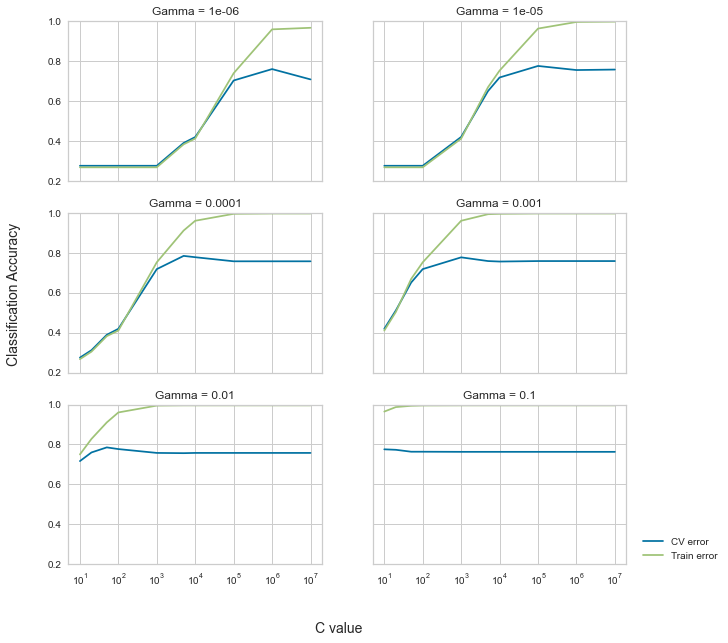

In [59]:
#model selection takes a few minutes, change this variable
#to true to run the parameter loop
do_model_selection = True

if do_model_selection:
    C_range = np.array([ 10, 20, 50, 100, 1000, 5000, 10000, 100000, 1000000, 10000000])
    gamma_range = np.array([0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1])
    
    fig, axes = plt.subplots(3, 2,
                     sharex='col', sharey='row',figsize=(10,10))
    plot_number = 0
    for outer_ind, gamma_value in enumerate(gamma_range):
        row = int(plot_number / 2)
        column = int(plot_number % 2)
        cv_errors = np.zeros(C_range.shape)
        train_errors = np.zeros(C_range.shape)
        for index, c_value in enumerate(C_range):
                                                     
            clf = SVC(C=c_value, gamma=gamma_value)
            clf.fit(X_train,y_train)
                                                             
            train_conf = confusion_matrix(y_train, clf.predict(X_train))
            cv_conf = confusion_matrix(y_test, clf.predict(X_test))
                                                                     
            cv_errors[index] = accuracy(cv_conf)
            train_errors[index] = accuracy(train_conf)
                                                                             
        ax = axes[row, column]
        ax.set_title('Gamma = %g'%gamma_value)
        ax.semilogx(C_range, cv_errors, label='CV error')
        ax.semilogx(C_range, train_errors, label='Train error')
        plot_number += 1
        ax.set_ylim([0.2,1])
                                                                                             
    ax.legend(bbox_to_anchor=(1.05, 0), loc='lower left', borderaxespad=0.)
    fig.text(0.5, 0.03, 'C value', ha='center',
             fontsize=14)
    
    fig.text(0.04, 0.5, 'Classification Accuracy', va='center',
             rotation='vertical', fontsize=14)

In [92]:
clf = SVC(C=10000, gamma=0.0001)

clf.fit(X_train,y_train)  
predicted_labels = clf.predict(X_test) 

print ('Accuracy:', accuracy_score(y_test, predicted_labels))
print ('F1 score:', f1_score(y_test, predicted_labels,average='weighted'))
print ('Recall:', recall_score(y_test, predicted_labels,
                              average='weighted'))
print ('Precision:', precision_score(y_test, predicted_labels,
                                    average='weighted'))
print ('\n clasification report:\n', classification_report(y_test, predicted_labels))
print ('\n confussion matrix:\n',confusion_matrix(y_test, predicted_labels))

Accuracy: 0.7788461538461539
F1 score: 0.7767439132069641
Recall: 0.7788461538461539
Precision: 0.778305845907683

 clasification report:
                                         precision    recall  f1-score   support

                  Cambiar estado de OT       0.75      0.82      0.78       457
Capacitación de módulo o funcionalidad       0.80      0.71      0.76        52
                     Configuración GPS       0.86      0.86      0.86       105
                Configuración de visor       0.60      0.55      0.58        65
    Creación / inactivación de usuario       0.83      0.79      0.81       141
                 Creación de servicios       0.80      0.92      0.86        26
             Datos erróneos en reporte       0.75      0.76      0.76       210
Disminución de desempeño de plataforma       0.69      0.47      0.56        19
        Gestión de tickets de servicio       0.85      0.85      0.85       287
   Informes de reporte y mantenimiento       0.90      0.76 

###  Applying data balancing with SMOTE library

In [61]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns

ANTES DE BALANCEO - DATA DE ENTRENAMIENTO: 


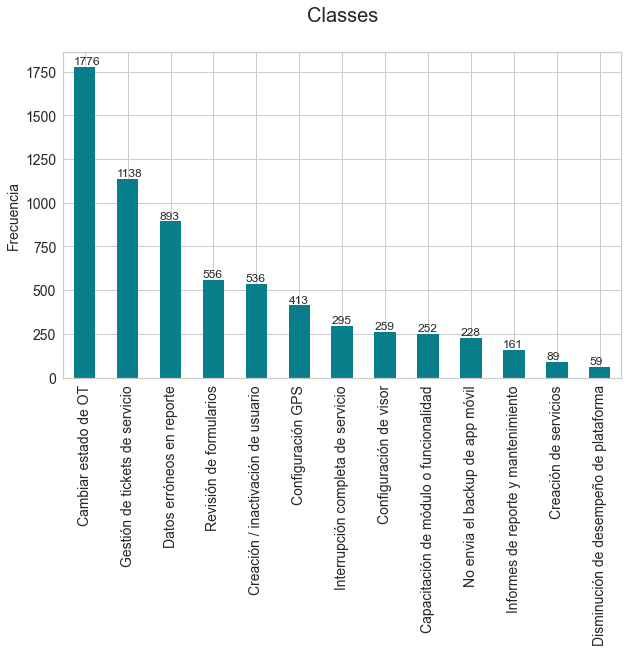

In [62]:
print("ANTES DE BALANCEO - DATA DE ENTRENAMIENTO: ")
ax = y_train.value_counts().plot(kind='bar', figsize=(10, 6), fontsize=14, color='#087E8B')
# ax = DataSet['Classes'].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='#087E8B')
ax.set_title('Classes', size=20, pad=30)
ax.set_ylabel('Frecuencia', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() , i.get_height() + 15, str(round(i.get_height(), 2)), fontsize=12)

###  Applying oversampling with SMOTE to the dataset 

In [63]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X_train, y_train) 

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (8319,)
Shape of X after SMOTE: (23088, 3637)

Balance of positive and negative classes (%):


Cambiar estado de OT                      7.692308
Informes de reporte y mantenimiento       7.692308
Revisión de formularios                   7.692308
Configuración GPS                         7.692308
Gestión de tickets de servicio            7.692308
Capacitación de módulo o funcionalidad    7.692308
No envia el backup de app móvil           7.692308
Creación / inactivación de usuario        7.692308
Configuración de visor                    7.692308
Disminución de desempeño de plataforma    7.692308
Interrupción completa de servicio         7.692308
Creación de servicios                     7.692308
Datos erróneos en reporte                 7.692308
Name: categoria, dtype: float64

###  SVM technique with oversampling and without parameter optimization

In [64]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sm, y_sm, test_size=0.25, random_state=42
)

classifier = SVC()    
classifier.fit(X_train, y_train)  
preds = classifier.predict(X_test) 

conf = confusion_matrix(y_test, preds)

print('Pattern classification accuracy = %f' % accuracy(conf))
print ('Accuracy:', accuracy_score(y_test, preds))
print ('F1 score:', f1_score(y_test, preds,average='weighted'))
print ('Recall:', recall_score(y_test, preds, average='weighted'))
print ('Precision:', precision_score(y_test, preds, average='weighted'))
print ('\n clasification report:\n', classification_report(y_test, preds))
print ('\n confussion matrix:\n',confusion_matrix(y_test, preds))

Pattern classification accuracy = 0.968815
Accuracy: 0.9688149688149689
F1 score: 0.968988922232578
Recall: 0.9688149688149689
Precision: 0.9695684523536873

 clasification report:
                                         precision    recall  f1-score   support

                  Cambiar estado de OT       0.81      0.87      0.84       438
Capacitación de módulo o funcionalidad       1.00      0.99      1.00       447
                     Configuración GPS       0.99      1.00      0.99       467
                Configuración de visor       1.00      1.00      1.00       414
    Creación / inactivación de usuario       0.94      0.98      0.96       446
                 Creación de servicios       0.99      1.00      0.99       457
             Datos erróneos en reporte       0.95      0.91      0.93       426
Disminución de desempeño de plataforma       1.00      1.00      1.00       436
        Gestión de tickets de servicio       0.96      0.91      0.94       425
   Informes de re

### SVM technique with oversampling and without parameter optimization evaluated through the following metrics

In [27]:
classifier = SVC() 

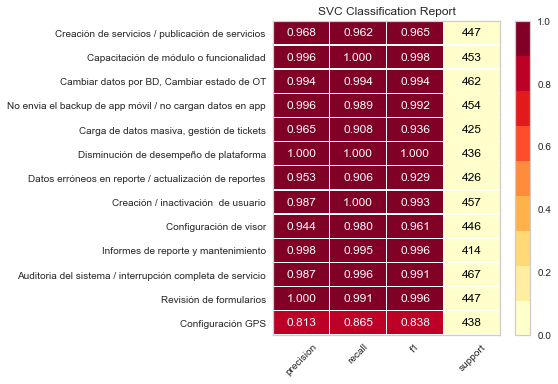

<Figure size 576x396 with 0 Axes>

In [65]:
# Deploy visualization for Classification Report
visualization =[CR_viz()]

Confusion matrix, without normalization
Normalized confusion matrix


<Figure size 576x396 with 0 Axes>

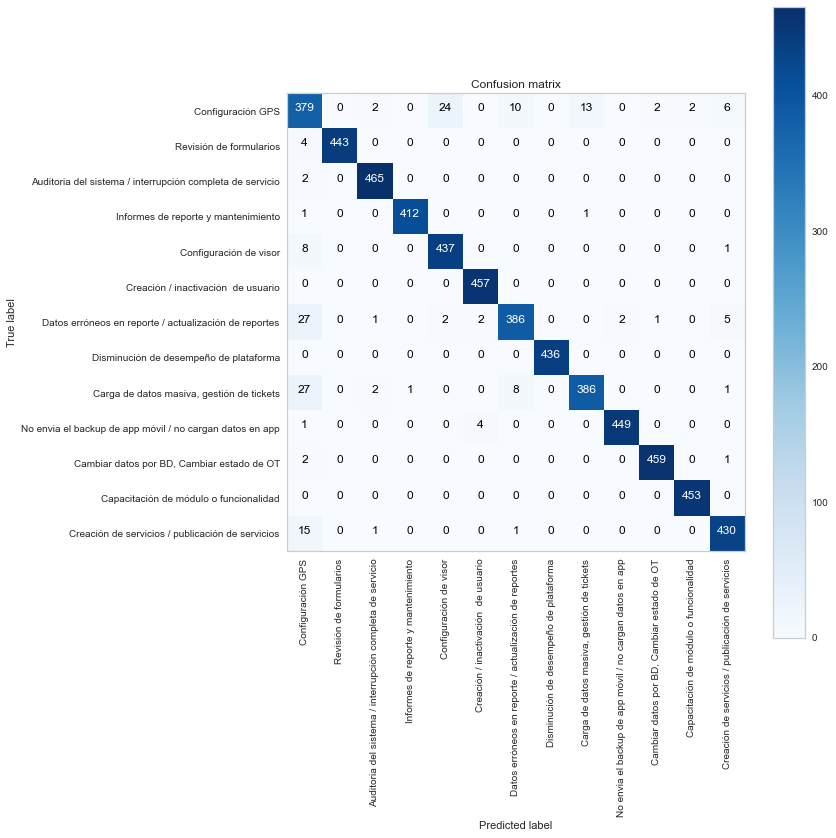

<Figure size 576x396 with 0 Axes>

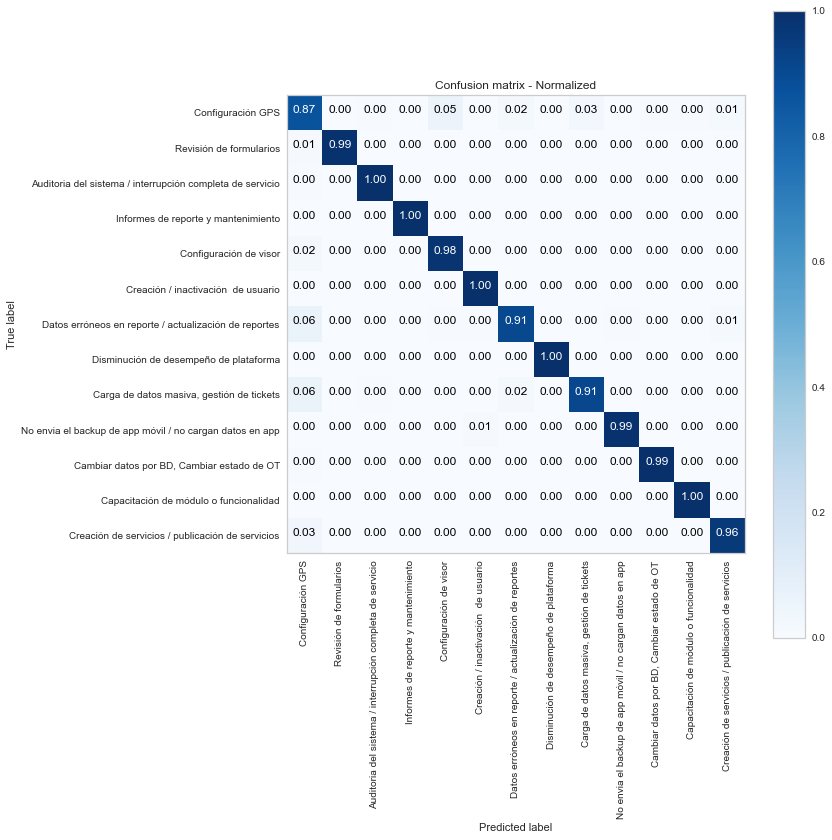

In [66]:
# Matriz de confusión
# Plot confusion matrix
plt.figure()
plot_confusion_matrix(conf, classes=patterns_labels,
                      title='Confusion matrix')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf, classes=patterns_labels, normalize=True,
                      title='Confusion matrix - Normalized')

plt.show()

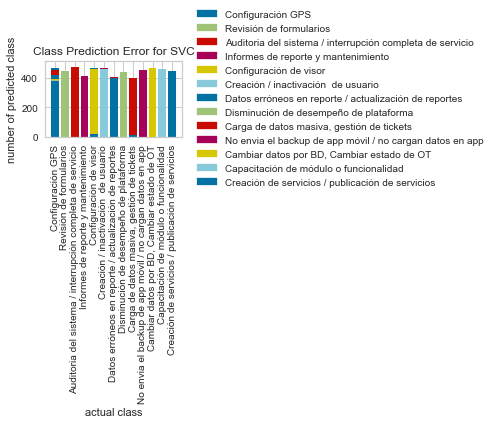

<Figure size 576x396 with 0 Axes>

In [68]:
#deploy visualization for Class prediction Error
visualization =[CPE_viz()]

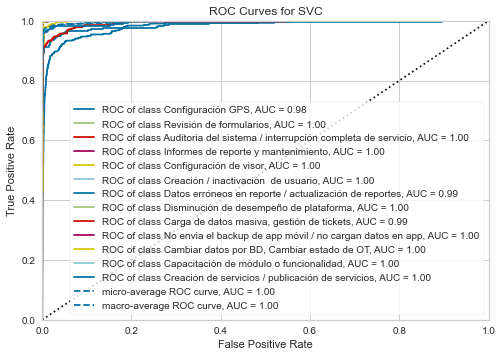

<Figure size 576x396 with 0 Axes>

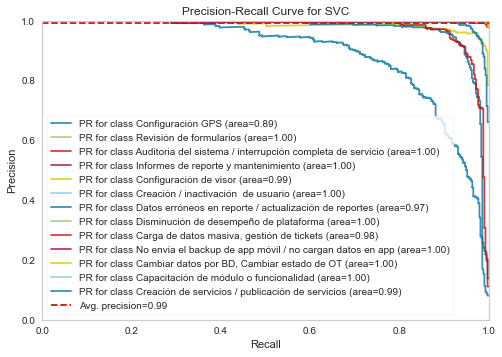

<Figure size 576x396 with 0 Axes>

In [69]:
# Deploy visualization for ROC Curve and Precision Recall Curve
visualization =[ROC_viz(),PRC_viz()]

In [70]:
#Deploy aggregate metrics  
classifier_metrics()

SVC()
cohen_kappa_score: 0.966
hemming_loss: 0.031
matthews_corrcoef: 0.966

------------------------------------------------------


###  SVM technique with oversampling and with parameter optimization


In [94]:
classifier = SVC(C=100000, gamma=0.0001)   
classifier.fit(X_train, y_train) 
preds = classifier.predict(X_test)

cm = confusion_matrix(y_test, preds)

print('Pattern classification accuracy = %f' % accuracy(cm))
print ('Accuracy:', accuracy_score(y_test, preds))
print ('F1 score:', f1_score(y_test, preds,average='weighted'))
print ('Recall:', recall_score(y_test, preds, average='weighted'))
print ('Precision:', precision_score(y_test, preds, average='weighted'))
print ('\n clasification report:\n', classification_report(y_test, preds))
print ('\n confussion matrix:\n',confusion_matrix(y_test, preds))

Pattern classification accuracy = 0.969335
Accuracy: 0.9693347193347194
F1 score: 0.9684765249787801
Recall: 0.9693347193347194
Precision: 0.9684926963812261

 clasification report:
                                         precision    recall  f1-score   support

                  Cambiar estado de OT       0.90      0.78      0.83       438
Capacitación de módulo o funcionalidad       0.99      1.00      1.00       447
                     Configuración GPS       0.99      1.00      0.99       467
                Configuración de visor       0.98      1.00      0.99       414
    Creación / inactivación de usuario       0.95      0.99      0.97       446
                 Creación de servicios       0.98      1.00      0.99       457
             Datos erróneos en reporte       0.94      0.92      0.93       426
Disminución de desempeño de plataforma       0.99      1.00      0.99       436
        Gestión de tickets de servicio       0.96      0.92      0.94       425
   Informes de r

DESPUÉS DE BALANCEO DATA DE ENTRENAMIENTO: 


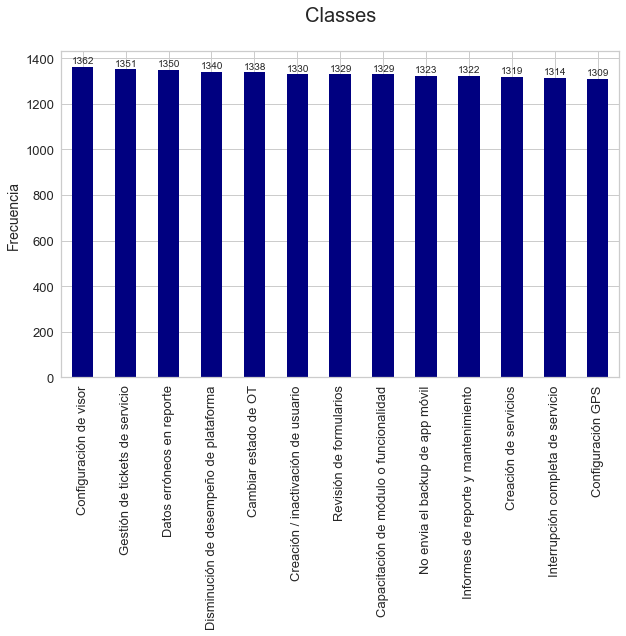

In [73]:
print("DESPUÉS DE BALANCEO DATA DE ENTRENAMIENTO: ")
ax = y_train.value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='navy')
ax.set_title('Classes', size=20, pad=30)
ax.set_ylabel('Frecuencia', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() , i.get_height() + 15, str(round(i.get_height(), 2)), fontsize=10)
    


### SVM technique with oversampling and with parameter optimization evaluated through the following metrics

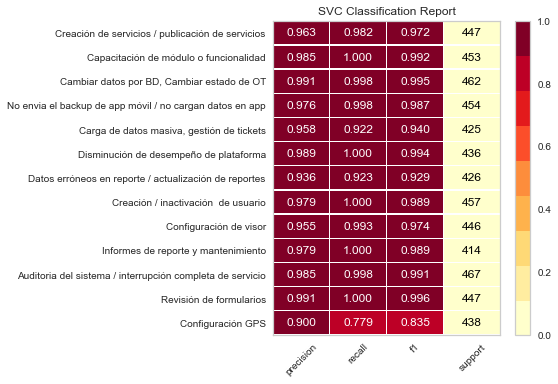

<Figure size 576x396 with 0 Axes>

In [74]:
#deploy visualization for Classification Report
visualization =[CR_viz()]

In [75]:
conf_rbf = confusion_matrix(y_test, preds)

Confusion matrix, without normalization
Normalized confusion matrix


<Figure size 576x396 with 0 Axes>

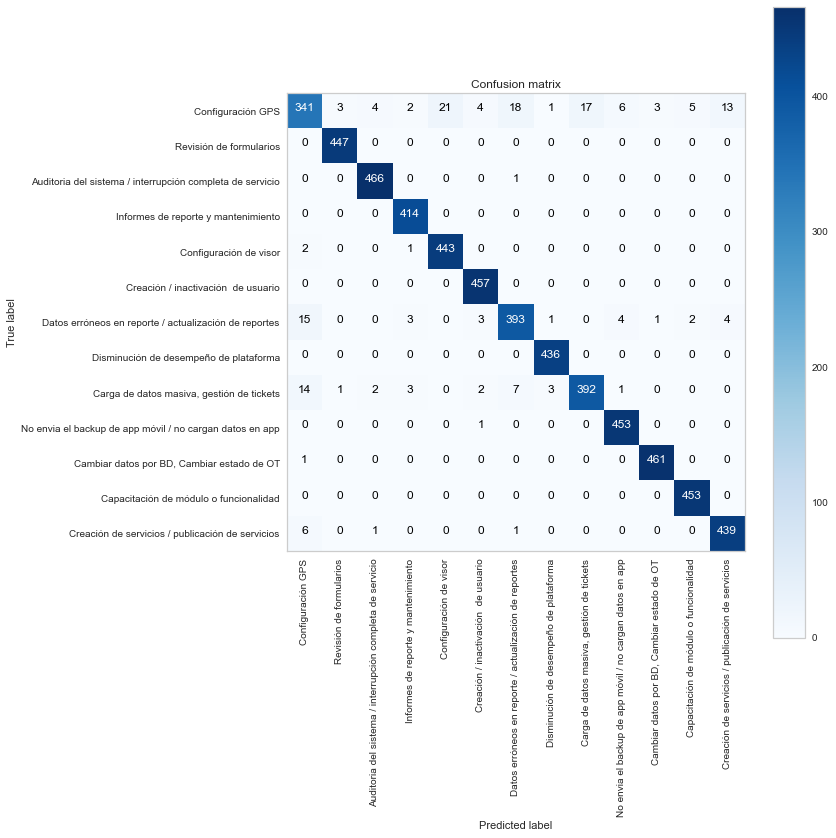

<Figure size 576x396 with 0 Axes>

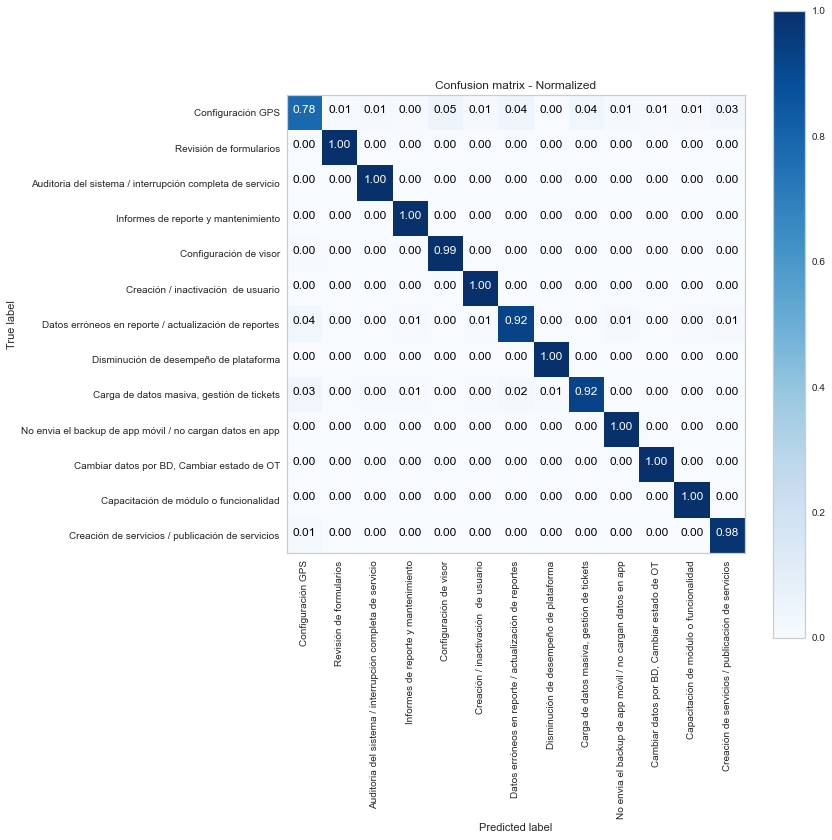

In [76]:
# Plot confusion matrix
plt.figure()
plot_confusion_matrix(conf_rbf, classes=patterns_labels,
                      title='Confusion matrix')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_rbf, classes=patterns_labels, normalize=True,
                      title='Confusion matrix - Normalized')

plt.show()

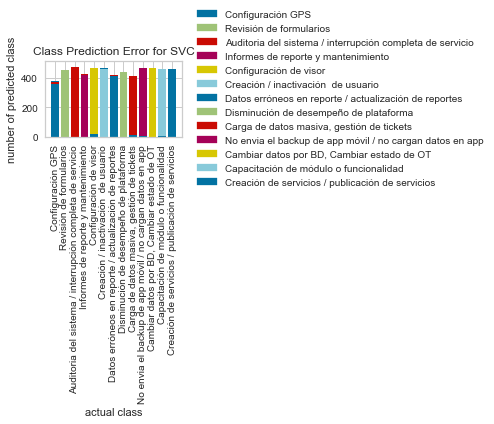

<Figure size 576x396 with 0 Axes>

In [78]:
#deploy visualization for Class prediction Error
visualization =[CPE_viz()]

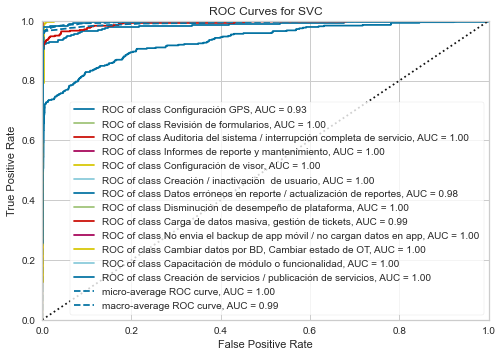

<Figure size 576x396 with 0 Axes>

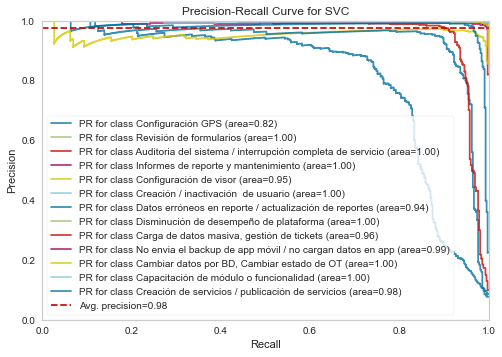

<Figure size 576x396 with 0 Axes>

In [79]:
#deploy visualization for ROC Curve and Precision Recall Curve
visualization =[ROC_viz(),PRC_viz()]

In [80]:
#Deploy aggregate metrics  
classifier_metrics()

SVC(C=100000, gamma=0.0001)
cohen_kappa_score: 0.967
hemming_loss: 0.031
matthews_corrcoef: 0.967

------------------------------------------------------


###  Applying undersampling with NEAR MISS to the dataset 

In [125]:
from imblearn.under_sampling import NearMiss

In [126]:
#Applying NearMiss

undersample = NearMiss()
X_train_us, y_train_us = undersample.fit_resample(X_train, y_train)

print(y_train.value_counts())
print(y_train_us.value_counts())

Cambiar estado de OT                      1776
Gestión de tickets de servicio            1138
Datos erróneos en reporte                  893
Revisión de formularios                    556
Creación / inactivación de usuario         536
Configuración GPS                          413
Interrupción completa de servicio          295
Configuración de visor                     259
Capacitación de módulo o funcionalidad     252
No envia el backup de app móvil            228
Informes de reporte y mantenimiento        161
Creación de servicios                       89
Disminución de desempeño de plataforma      59
Name: categoria, dtype: int64
No envia el backup de app móvil           59
Disminución de desempeño de plataforma    59
Gestión de tickets de servicio            59
Creación de servicios                     59
Interrupción completa de servicio         59
Creación / inactivación de usuario        59
Configuración de visor                    59
Datos erróneos en reporte                 59

###  SVM technique with undersampling and without parameter optimization

In [109]:

# aquí de vuelven a definir los datos para training y validación a partir del balanceo realizado
X_train, X_test, y_train, y_test = train_test_split(
    X_train_us, y_train_us, test_size=0.25, random_state=42
)

classifier = SVC()  # se sigue definiendo el SVM como clasificador
classifier.fit(X_train, y_train) # entrenamiento del modelo
preds = classifier.predict(X_test)# predicciones obtenidas a partir de la data de validación


cm = confusion_matrix(y_test, preds)
# imprimimos los resultados obtenidos por medio de las métricas mostradas a continuación:
print('Pattern classification accuracy = %f' % accuracy(cm))
print ('Accuracy:', accuracy_score(y_test, preds))
print ('F1 score:', f1_score(y_test, preds,average='weighted'))
print ('Recall:', recall_score(y_test, preds, average='weighted'))
print ('Precision:', precision_score(y_test, preds, average='weighted'))
print ('\n clasification report:\n', classification_report(y_test, preds))
print ('\n confussion matrix:\n',confusion_matrix(y_test, preds))

Pattern classification accuracy = 0.572917
Accuracy: 0.5729166666666666
F1 score: 0.5863719890664155
Recall: 0.5729166666666666
Precision: 0.6769248546592298

 clasification report:
                                         precision    recall  f1-score   support

                  Cambiar estado de OT       0.25      0.64      0.36        14
Capacitación de módulo o funcionalidad       0.69      0.47      0.56        19
                     Configuración GPS       1.00      0.64      0.78        14
                Configuración de visor       0.83      0.53      0.65        19
    Creación / inactivación de usuario       0.92      0.86      0.89        14
                 Creación de servicios       0.81      0.81      0.81        16
             Datos erróneos en reporte       0.80      0.25      0.38        16
Disminución de desempeño de plataforma       0.33      0.58      0.42        12
        Gestión de tickets de servicio       0.31      0.29      0.30        14
   Informes de r

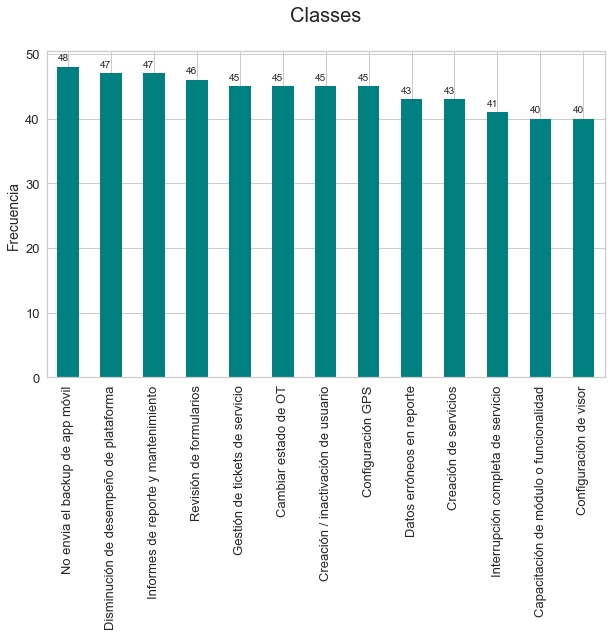

In [110]:
ax = y_train.value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='teal')
ax.set_title('Classes', size=20, pad=30)
ax.set_ylabel('Frecuencia', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() , i.get_height() + 1, str(round(i.get_height(), 2)), fontsize=10)
    
#     X_sm, y_sm

###  SVM technique with undersampling and with parameter optimization

In [142]:
classifier = SVC(C=10000, gamma=0.0001)   
classifier.fit(X_train, y_train) 
preds = classifier.predict(X_test)

cm = confusion_matrix(y_test, preds)

print('Pattern classification accuracy = %f' % accuracy(cm))
print ('Accuracy:', accuracy_score(y_test, preds))
print ('F1 score:', f1_score(y_test, preds,average='weighted'))
print ('Recall:', recall_score(y_test, preds, average='weighted'))
print ('Precision:', precision_score(y_test, preds, average='weighted'))
print ('\n clasification report:\n', classification_report(y_test, preds))
print ('\n confussion matrix:\n',confusion_matrix(y_test, preds))

Pattern classification accuracy = 0.635417
Accuracy: 0.6354166666666666
F1 score: 0.6417005718669025
Recall: 0.6354166666666666
Precision: 0.6748501383726567

 clasification report:
                                         precision    recall  f1-score   support

                  Cambiar estado de OT       0.31      0.57      0.40        14
Capacitación de módulo o funcionalidad       0.69      0.58      0.63        19
                     Configuración GPS       0.92      0.86      0.89        14
                Configuración de visor       0.92      0.63      0.75        19
    Creación / inactivación de usuario       0.76      0.93      0.84        14
                 Creación de servicios       0.82      0.88      0.85        16
             Datos erróneos en reporte       0.50      0.25      0.33        16
Disminución de desempeño de plataforma       0.35      0.58      0.44        12
        Gestión de tickets de servicio       0.29      0.29      0.29        14
   Informes de r

### SVM technique with undersampling and with parameter optimization evaluated through the following metrics

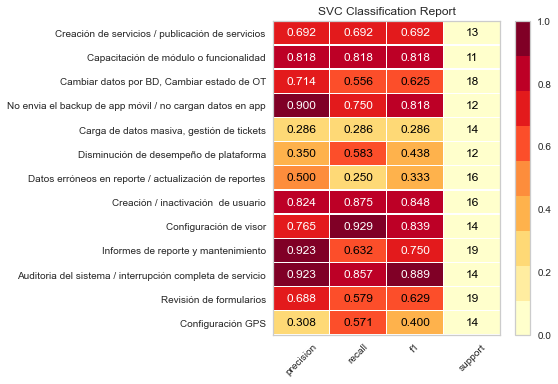

<Figure size 576x396 with 0 Axes>

In [134]:
#deploy visualization for Classification Report
visualization =[CR_viz()]

In [136]:
conf_rbf = confusion_matrix(y_test, preds)

Confusion matrix, without normalization
Normalized confusion matrix


<Figure size 576x396 with 0 Axes>

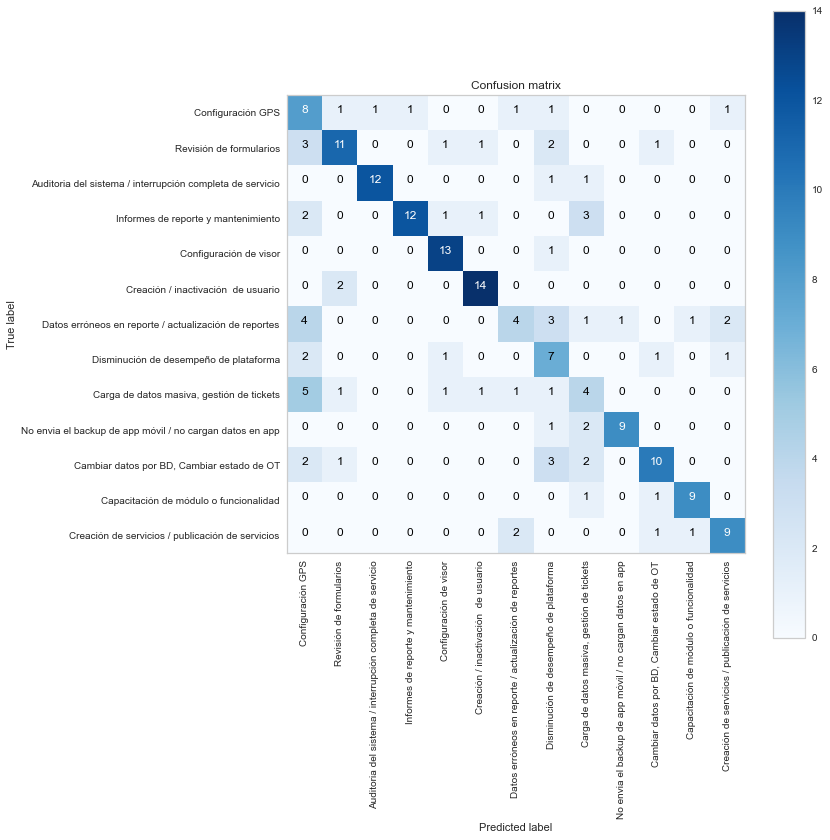

<Figure size 576x396 with 0 Axes>

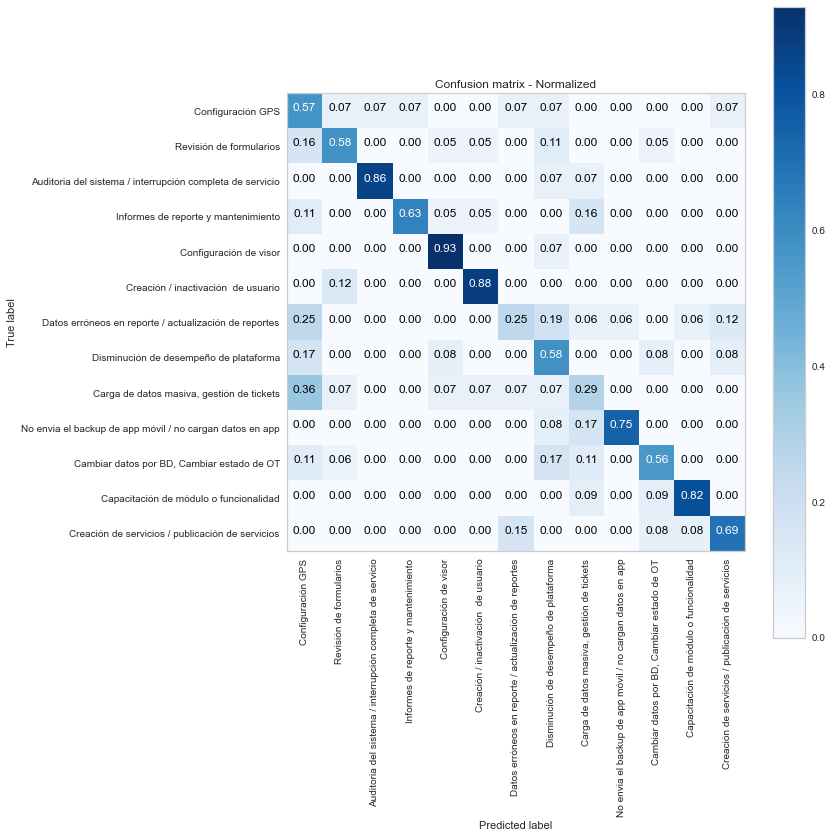

In [137]:
# Plot confusion matrix
plt.figure()
plot_confusion_matrix(conf_rbf, classes=patterns_labels,
                      title='Confusion matrix')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_rbf, classes=patterns_labels, normalize=True,
                      title='Confusion matrix - Normalized')

plt.show()

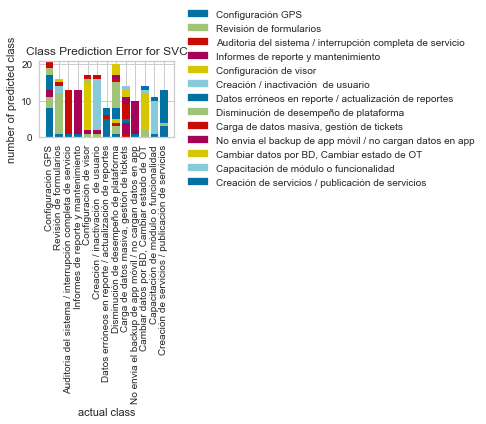

<Figure size 576x396 with 0 Axes>

In [138]:
#deploy visualization for Class prediction Error
visualization =[CPE_viz()]

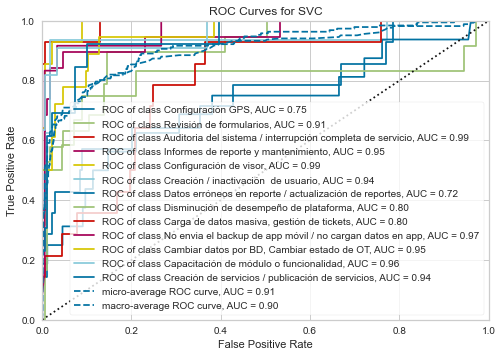

<Figure size 576x396 with 0 Axes>

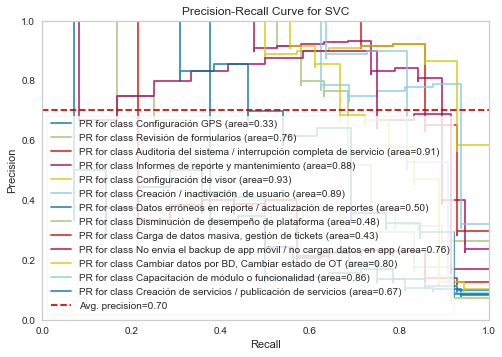

<Figure size 576x396 with 0 Axes>

In [139]:
#deploy visualization for ROC Curve and Precision Recall Curve
visualization =[ROC_viz(),PRC_viz()]

In [140]:
#Deploy aggregate metrics  
classifier_metrics()

SVC(C=10000, gamma=0.0001)
cohen_kappa_score: 0.605
hemming_loss: 0.365
matthews_corrcoef: 0.608

------------------------------------------------------
